In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from perceptron import Perceptron


s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# df = pd.read_csv(s, header=None, encoding="utf-8")
df = pd.read_csv("iris_data.csv")

print(df.tail())

     5.1  3.5  1.4  0.2     Iris-setosa
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica


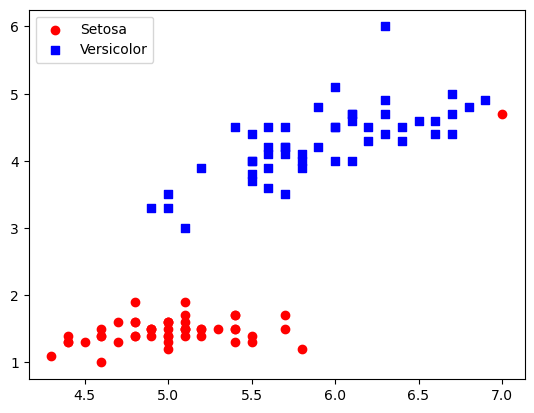

In [22]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
# iris-setosa turns to 0; all other flowers would be a 1. in this case, it's only one other flower - versicolor, hence the binary format.
y = np.where(y == "Iris-setosa", 0, 1)

# Select 0th and 2nd column; each example is a horizontal vector of two features.
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="s", label="Versicolor")
plt.legend(loc="upper left")
plt.show()


100
100
(array([4.9, 1.4]), 0)
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
update, xi, b: -0.1 [4.9 1.4] -0.1
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to the method:  (2,)
shape of the return value of the method:  ()
shape of X given to t

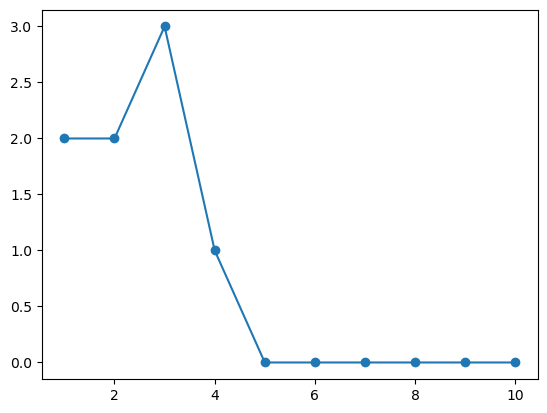

In [23]:
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")


In [24]:
from matplotlib.colors import ListedColormap

#  In this code:

# - What is resolution? It's a step between each number.
    # Follow-up question: why do we make a meshgrid out of fake data? (x1_min to x1_max with resolution's value as steps)
    # Do we do it to visualize? Why can't we use samples from the actual dataset, then, and put them on the graph? Maybe to predict a decision boundary while not using the real dataset.


# - Why do we subtract 1 in x1_min, x1_max, x2_min...

# - What is lab? An array of 0s and 1s - predictions.
    # Why do we transpose the array passed into predict method?
    # Why do we reshape the lab?

# - What is ravel()?; why do we use it?

# What is contourf?

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map 
    markers = ('o', 's', "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
    # how is resolution used here? To make steps between values to create fake data

    # What does np.meshgrid do exactly, what's it's return type, and what is it's return value typically used for?
    # How come that xx1 and xx2 turn to be 2D-arrays if all we pass into np.arange are min and max values, and the step between those values? Where does the second dimension come from?
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # print("xx1 type: ", type(xx1), " xx2 type:", type(xx2))

    # print("shape before transposing: ", np.array([xx1.ravel(), xx2.ravel()]).shape)
    # print("shape after transposing: ", np.array([xx1.ravel(), xx2.ravel()]).T.shape)

    # predict method here doesn't return a scalar as opposed to calling it within the Perceptron class
    # because in the class we call the predict on every example one-by-one, passing a 1D array of all the columns, or features, while here we pass a 2D array.
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # print("lab shape: ", lab.shape, "lab", lab)

    lab = lab.reshape(xx1.shape)
    # print("xx1.shape", xx1.shape)
    # print("xx1.shape", xx2.shape)
    # print("lab shape: ", lab.shape, "lab", lab)


    # What exactly does contourf do with xx1, xx2, and lab?
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples

    # There are only two unique ys: 0 and 1. This block of code is to make it work for when there are more than two labels as well.
    # idx is there to use the color for a particular class.
    # cl is to access classes 0 and 1.

    # This code does NOT outline the decision boundary.
    for idx, cl in enumerate(np.unique(y)):
        # For every class (0 and 1 in this case), plot the points of that class. So, plot the points of class 0 first, then points of class 1.
        # The y axis here is in reality the values of x2 in the dataset; it's just the second column. This is why for the x we use the first column
        # and for y the second column. It makes it possible to visualize it on a 2D graph.
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f"Class {cl}",
                    edgecolor="black")

shape of X given to the method:  (35, 2)
shape of the return value of the method:  (35,)


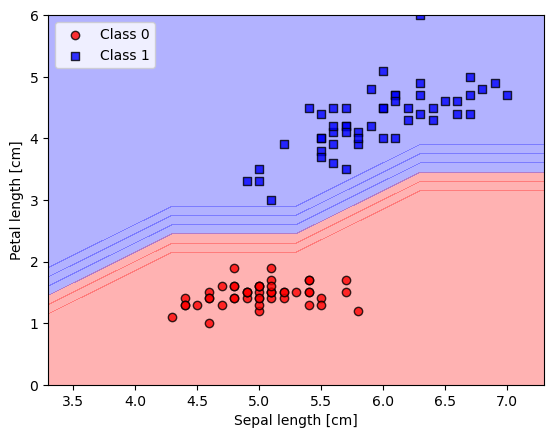

In [ ]:
plot_decision_regions(X, y, classifier=ppn, resolution=0.02)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()